In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

In [2]:
model, solver = load_POMDP_file(file_name='./Example Models/4x4.95.POMDP')

In [3]:
model.convert_to_grid([
    ['s0', 's1', 's2', 's3'],
    ['s4', 's5', 's6', 's7'],
    ['s8', 's9', 's10', 's11'],
    ['s12', 's13', 's14', 's15']
    ])

In [4]:
solver.eps = 10e-4

In [5]:
vf, history = solver.solve(model, 10,10)

Expansions:   0%|          | 0/10 [00:00<?, ?it/s]

Expansions:  40%|████      | 4/10 [00:02<00:03,  1.86it/s]

Converged early...


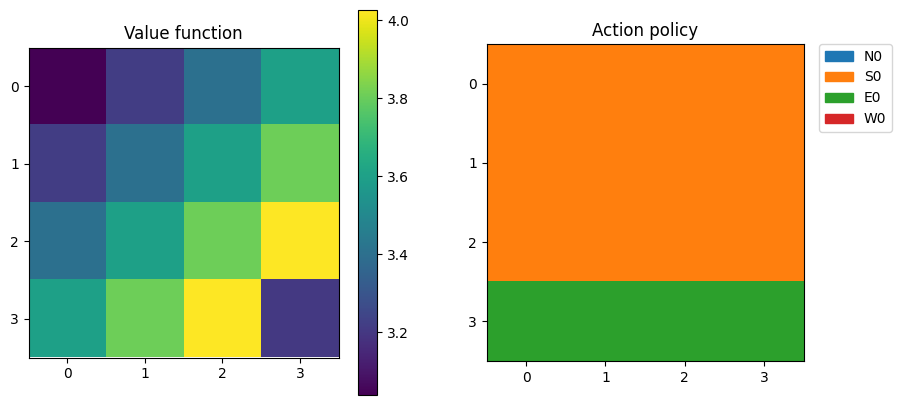

In [6]:
vf.plot()

In [7]:
sim = Simulation(model=model, done_on_state=15)
a = Agent(model)
a.value_function = vf

In [8]:
rh = a.simulate(sim)

In [9]:
rh.save_simulation_video()

Video saved at 'Sim Videos/s16-a4-20230908_003142.mp4'...


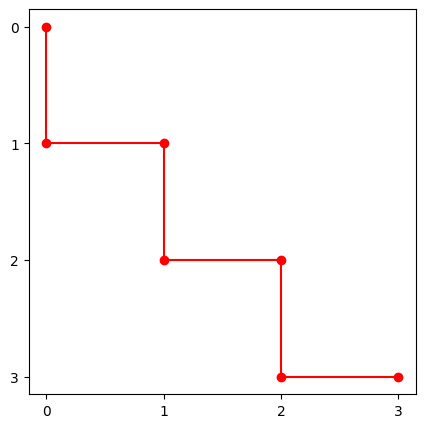

In [9]:
rh.plot_simulation_steps()

In [10]:
for step in rh:
    print(f"{step['state']} - {step['action']}")

4 - 1
8 - 2
9 - 1
13 - 2
14 - 1
14 - 2


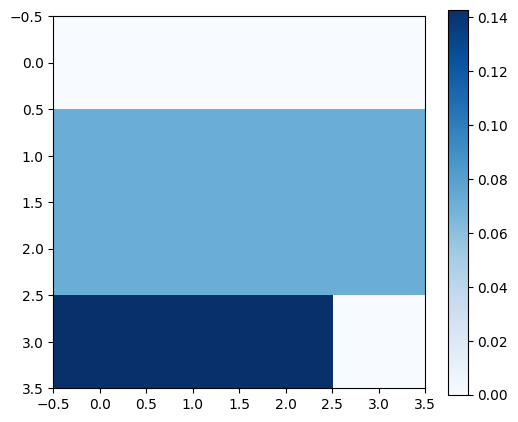

In [19]:
rh[1]['belief'].plot()

In [20]:
state_list = [rh[0]['state']]
for step in rh:
    state_list.append(step['next_state'])

In [26]:
state_points = []

for state in state_list:
    state_label = model.state_labels[state]
    for y, y_state_list in enumerate(model.grid_states):
        for x, x_state in enumerate(y_state_list):
            if x_state == state_label:
                state_points.append([x,y])


In [31]:
belief = rh[0]['next_belief']

dimensions = (len(model.grid_states), len(model.grid_states[0]))
values = np.zeros(dimensions)

for x in range(values.shape[0]):
    for y in range(values.shape[1]):
        state_label = model.grid_states[x][y]
        
        if state_label is not None:
            s = model.state_labels.index(state_label) # type: ignore
            values[x,y] = belief[s]

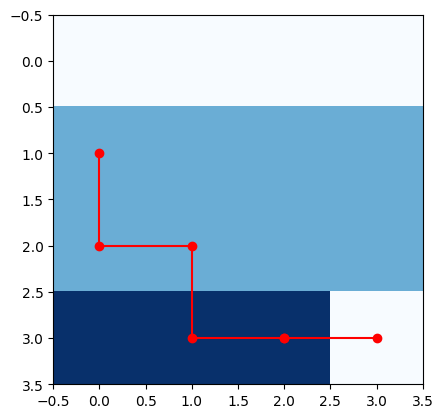

In [32]:
data = np.array(state_points)
plt.imshow(values, cmap='Blues')
plt.plot(data[:, 0], data[:, 1], color='red')
plt.scatter(data[:, 0], data[:, 1], color='red')